In [24]:
function accuracy()
    ac=500;
    return ac;
end
setprecision(accuracy());

In [25]:
function order()
    M=10;
    return M+1;
end

order (generic function with 1 method)

In [26]:
function steps()
    h = BigFloat(1)/BigFloat(100)
    return h;
end

steps (generic function with 1 method)

In [27]:
function JCh(k,i)
     
    k = BigFloat(k);
    i = BigFloat(i);
    s = BigFloat(1);
    if i < k/2
        i = k - i;
    end
    for j in range(k,i+1,step=-1)
        
        j1=BigFloat(j)
        s = s*j1/(j1-i)
        
    end
    
    return s
end

JCh (generic function with 1 method)

In [28]:
function DJCh()
    Cki = Array{BigFloat}(undef,order()-1,order()-1);
    for k in 1:order()-1
        for j in 1:k
            Cki[k,j] = 1
        end
    end
    
    for k in 2:order()-2
        for i in 1:k-1
           Cki[k+1,i+1] = Cki[k,i] + Cki[k,i+1]
        end
    end
    return Cki
end

DJCh (generic function with 1 method)

In [29]:
function multi()
    S = Array{BigFloat}(undef,1,order());
    S[1] = BigFloat(1)
    
    for i in 1:order()-1
        S[i+1] = S[i]*steps()/BigFloat(i)
    end
    
    return S
end

multi (generic function with 1 method)

In [30]:
fdot(x,y,z) = @. x*y*z

fdot (generic function with 1 method)

In [31]:
function Sumxx(x,k,Cki)
    xx = Array{BigFloat}(undef,k)
    for i in 1:k
        xx[i] = sum(fdot(Cki[i,1:i],x[1:i],reverse!(x[1:i])))
    end
    return xx
end 

Sumxx (generic function with 1 method)

In [32]:
function Sumxyz(x,k,Cki)
    return sum(fdot(Cki[k,1:k],Sumxx(x[1:end],k,Cki),reverse!(x[1:end])))
end 

Sumxyz (generic function with 1 method)

In [33]:
function Sumuu(x,u,k,Cki)
    xu = Array{BigFloat}(undef,k)
    for i in 1:k
        xu[i] = sum(fdot(Cki[i,1:i],u[1:i],reverse!(x[1:i])))
    end
    return xu
end 

Sumuu (generic function with 1 method)

In [34]:
function Sumuvw(x,u,k,Cki)
    return sum(fdot(Cki[k,1:k],Sumxx(x[1:end],k,Cki),reverse!(u[1:end]))) + 2*sum(fdot(Cki[k,1:k],Sumuu(x[1:end],u[1:end],k,Cki),reverse!(x[1:end])))
end 

Sumuvw (generic function with 1 method)

In [35]:
function Talor(x,y,z,u,v,w,Cki,Tin)
    for k in 1:order()-1
        
        if mod(k,4) == 1
            x[k+1] = y[k]
            y[k+1] = a*c^(k-1)*cos(c*Tin) - b*y[k] - x[k] - Sumxyz(x[1:k],k,Cki)
            z[k+1] = 0
        elseif mod(k,4) == 2
            x[k+1] = y[k]
            y[k+1] = -a*c^(k-1)*sin(c*Tin) - b*y[k] - x[k] - Sumxyz(x[1:k],k,Cki)
            z[k+1] = 0
        elseif mod(k,4) == 3
            x[k+1] = y[k]
            y[k+1] = -a*c^(k-1)*cos(c*Tin) - b*y[k] - x[k] - Sumxyz(x[1:k],k,Cki)
            z[k+1] = 0
        else
            x[k+1] = y[k]
            y[k+1] = a*c^(k-1)*sin(c*Tin) - b*y[k] - x[k] - Sumxyz(x[1:k],k,Cki)
            z[k+1] = 0
        end
        
        
        u[k+1] = v[k]
        v[k+1] = -b*v[k] - u[k] - Sumuvw(x[1:k],u[1:k],k,Cki)
        w[k+1] = 0
        
        
    end
    
    return x,y,z,u,v,w
end

Talor (generic function with 1 method)

In [36]:
function Iteration(x,y,z,u,v,w,Cki,Tin)
    
    for st in 1:Times
    
        x,y,z,u,v,w = Talor(x,y,z,u,v,w,Cki,Tin)
        
        x[1] = sum(x[1:end].*Dmulti[1:end])
        y[1] = sum(y[1:end].*Dmulti[1:end])
        z[1] = sum(z[1:end].*Dmulti[1:end])
        
        u[1] = sum(u[1:end].*Dmulti[1:end])
        v[1] = sum(v[1:end].*Dmulti[1:end])
        w[1] = sum(w[1:end].*Dmulti[1:end])
    
        Lorenz[st,:] = [x[1],y[1],z[1]] 
        Lorenzf[st,:] = convert.(Float64,Lorenz[st,:])
        
        Ep[st] = (log10(abs(u[1]))+log10(abs(v[1])))/2 
      
        Tin = Tin + steps()
        if mod(st,1000) == 0
            println(st,") ","time=",convert(Float16,Tin),": ",convert(Float16,Ep[st])," ",Lorenzf[st,1:2])
        end
        
    end
    
    return Lorenz,Ep
    
end

Iteration (generic function with 1 method)

In [37]:
Times = 100*5000;      

a =  BigFloat(92) + BigFloat(825)/BigFloat(1000);
b =  BigFloat(1)/BigFloat(10);
c =  BigFloat(1)/BigFloat(1);

x = Array{BigFloat}(undef,order())
y = Array{BigFloat}(undef,order())
z = Array{BigFloat}(undef,order())
u = Array{BigFloat}(undef,order())
v = Array{BigFloat}(undef,order())
w = Array{BigFloat}(undef,order())
Lorenz = Array{BigFloat}(undef,Times,3);
HH = Array{BigFloat}(undef,Times,3);
Ep = Array{BigFloat}(undef,Times,1);
Lorenzf = Array{Float32}(undef,Times,3);
Dmulti = Array{BigFloat}(undef,1,order());
Cki = Array{BigFloat}(undef,order()-1,order()-1);

x[1] = BigFloat(0); 
y[1] = BigFloat(0); 
z[1] = BigFloat(0);
Tin = BigFloat(0)

mep = BigFloat(10)^BigFloat(-270)
u[1] = mep
v[1] = mep
w[1] = mep

Cki = DJCh();
Dmulti = multi();

In [38]:
HH,Ep = Iteration(x,y,z,u,v,w,Cki,Tin);

1000) time=10.0: -269.0 Float32[-5.9130254, 8.230089]
2000) time=20.0: -268.2 Float32[3.8298867, -9.493954]
3000) time=30.0: -267.2 Float32[-2.8617077, 1.3126392]
4000) time=40.0: -266.8 Float32[-5.442636, -1.4658421]
5000) time=50.0: -267.0 Float32[5.9130073, 0.7419277]
6000) time=60.0: -265.8 Float32[-5.2012115, 13.2261915]
7000) time=70.0: -265.0 Float32[3.674266, -17.472723]
8000) time=80.0: -264.8 Float32[-1.6555414, 17.622944]
9000) time=90.0: -264.8 Float32[-2.8583572, 0.45687288]
10000) time=100.0: -264.8 Float32[3.9094362, -15.263062]
11000) time=110.0: -264.5 Float32[-2.6254573, 8.670633]
12000) time=120.0: -263.8 Float32[3.6587522, -1.2819835]
13000) time=130.0: -263.5 Float32[-4.7532086, 11.5313225]
14000) time=140.0: -263.0 Float32[1.9722769, 1.252572]
15000) time=150.0: -262.5 Float32[4.8870134, -10.141752]
16000) time=160.0: -262.5 Float32[-5.4868875, 4.005605]
17000) time=170.0: -262.0 Float32[4.089382, -21.267637]
18000) time=180.0: -261.0 Float32[-3.7706084, 17.279697

In [39]:
using Plots; 
plot(1:Times,Ep[1:end])

In [47]:
#write
function Wfile(AT,BE,Times)
#change name--------------------------------------------
    XLSX.openxlsx("CNEP_Duffing.xlsx", mode="w") do xf
#-------------------------------------------------------
        sheet = xf[1]
        XLSX.rename!(sheet, "new_sheet")
#change location----------------------------------------
        sheet["A1"] = "T"
        sheet["B1"] = "Ep"
        sheet["A2",dim=1] = AT[1:end]
        sheet["B2",dim=1] = BE[1:end]
#-------------------------------------------------------
    end
end
#-----------------------------------------------------------------------------
using XLSX
#time-----------------------------------------------------
AT=Array{Float32}(undef,Times)
for i in 1:Times
    AT[i]=i*steps()
end
#time-----------------------------------------------------
BE=Ep[1:end];
#--------------------------------------------------------
Wfile(AT,BE,Times);

In [41]:
sk = 0
sn = 0
for i in range(25000,Times,step=10000)
    sk = sk + (Ep[i]-Ep[1])/((i-1)*steps())
    sn = sn + 1
end
sk/sn

0.027831160952108044944921096387698554269818936069280053294814438343731128922295619905454344152851477739361574189569311543215838478353742651320221413735572

In [ ]:
plot(1:Times,HH[1:end,1])

In [43]:
Tinf = 2000
ep = BigFloat(10)^(-10-0.03*Tinf)

1.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000002e-70

In [44]:
#----------------------------
#精度——阶数分析
fdot(x,y,z) = @. x*y*z
function Sumxx(x,k,Cki)
    xx = Array{BigFloat}(undef,k)
    for i in 1:k
        xx[i] = sum(fdot(Cki[i,1:i],x[1:i],reverse!(x[1:i])))
    end
    return xx
end 

function Sumxyz(x,k,Cki)
    return sum(fdot(Cki[k,1:k],Sumxx(x[1:end],k,Cki),reverse!(x[1:end])))
end 
function steps2()
    h = BigFloat(1)/BigFloat(100)
    return h;
end
function order2()
    M=45;
    return M+1;
end
function DJCh2()
    Cki = Array{BigFloat}(undef,order2()-1,order2()-1);
    for k in 1:order2()-1
        for j in 1:k
            Cki[k,j] = 1
        end
    end
    
    for k in 2:order2()-2
        for i in 1:k-1
           Cki[k+1,i+1] = Cki[k,i] + Cki[k,i+1]
        end
    end
    return Cki
end
function multi2()
    S = Array{BigFloat}(undef,1,order2());
    S[1] = BigFloat(1)
    
    for i in 1:order2()-1
        S[i+1] = S[i]*steps2()/BigFloat(i)
    end
    
    return S
end
function Talor2(x,y,z,Cki)
    for k in 1:order2()-1
        
        if mod(k,4) == 1
            x[k+1] = y[k]
            y[k+1] = a*c^(k-1)*cos(c*Tin) - b*y[k] - x[k] - Sumxyz(x[1:k],k,Cki)
            z[k+1] = 0
        elseif mod(k,4) == 2
            x[k+1] = y[k]
            y[k+1] = -a*c^(k-1)*sin(c*Tin) - b*y[k] - x[k] - Sumxyz(x[1:k],k,Cki)
            z[k+1] = 0
        elseif mod(k,4) == 3
            x[k+1] = y[k]
            y[k+1] = -a*c^(k-1)*cos(c*Tin) - b*y[k] - x[k] - Sumxyz(x[1:k],k,Cki)
            z[k+1] = 0
        else
            x[k+1] = y[k]
            y[k+1] = a*c^(k-1)*sin(c*Tin) - b*y[k] - x[k] - Sumxyz(x[1:k],k,Cki)
            z[k+1] = 0
        end
        
    end
    
    return x,y,z
end

a =  BigFloat(92) + BigFloat(825)/BigFloat(1000);
b =  BigFloat(1)/BigFloat(10);
c =  BigFloat(1)/BigFloat(1);

x = Array{BigFloat}(undef,order2())
y = Array{BigFloat}(undef,order2())
z = Array{BigFloat}(undef,order2())
Dmulti = Array{BigFloat}(undef,1,order2());
Cki = Array{BigFloat}(undef,order2()-1,order2()-1);
Cki = DJCh2();
Dmulti = multi2();

x[1] = BigFloat(0); 
y[1] = BigFloat(0); 
z[1] = BigFloat(0);
Tin = BigFloat(0)

x,y,z = Talor2(x,y,z,Cki)
m = x[end]*Dmulti[end] + y[end]*Dmulti[end] +z[end]*Dmulti[end]
println(convert(Float16,log10(abs(m))))

-75.7


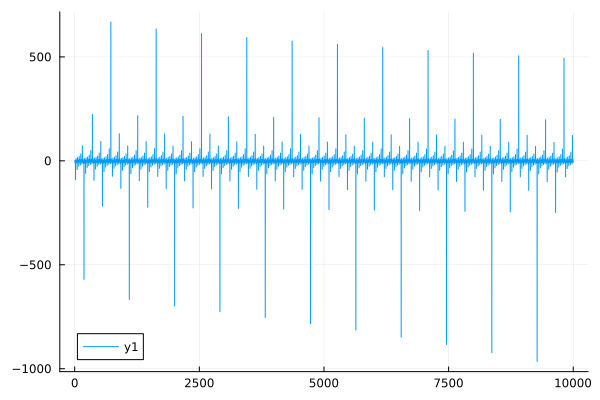

In [45]:
#收敛半径R
fdot(x,y,z) = @. x*y*z
function Sumxyz(x,y,Cki)
    return sum(fdot(Cki[1:end],reverse!(x[1:end]),y[1:end]))
end 
function steps2()
    h = BigFloat(1)/BigFloat(10000)
    return h;
end
function order2()
    M=10000;
    return M+1;
end
function DJCh2()
    Cki = Array{BigFloat}(undef,order2()-1,order2()-1);
    for k in 1:order2()-1
        for j in 1:k
            Cki[k,j] = 1
        end
    end
    
    for k in 2:order2()-2
        for i in 1:k-1
           Cki[k+1,i+1] = Cki[k,i] + Cki[k,i+1]
        end
    end
    return Cki
end
function multi2()
    S = Array{BigFloat}(undef,1,order2());
    S[1] = BigFloat(1)
    
    for i in 1:order2()-1
        S[i+1] = S[i]*steps2()/BigFloat(i)
    end
    
    return S
end
function Talor2(x,y,z,Cki)
    for k in 1:order2()-1
        
        x[k+1] = -y[k] - z[k]
        y[k+1] = x[k] + a*y[k]
        z[k+1] = b - c*z[k] + Sumxyz(x[1:k],z[1:k],Cki[k,1:k])
    
    end
    
    return x[2:end]./x[1:end-1],y[2:end]./y[1:end-1],z[2:end]./z[1:end-1]
end

a =  BigFloat(3)/BigFloat(20);
b =  BigFloat(2)/BigFloat(10);
c =  BigFloat(10)

x = Array{BigFloat}(undef,order2())
y = Array{BigFloat}(undef,order2())
z = Array{BigFloat}(undef,order2())
x1 = Array{BigFloat}(undef,order2()-1)
y1 = Array{BigFloat}(undef,order2()-1)
z1 = Array{BigFloat}(undef,order2()-1)
Shun = Array{BigFloat}(undef,order2()-1)
Dmulti = Array{BigFloat}(undef,1,order2());
Cki = Array{BigFloat}(undef,order2()-1,order2()-1);
Cki = DJCh2();
Dmulti = multi2();

x[1] = BigFloat(1); 
y[1] = BigFloat(2); 
z[1] = BigFloat(3);

for i in 1:order2()-1
    Shun[i] = i+1
end

x1,y1,z1 = Talor2(x,y,z,Cki);
#println(convert(Float16,log10(abs(m))))
y1 = y1[1:end]./Shun[1:end]
using Plots; 
plot(1:order2()-1,y1)

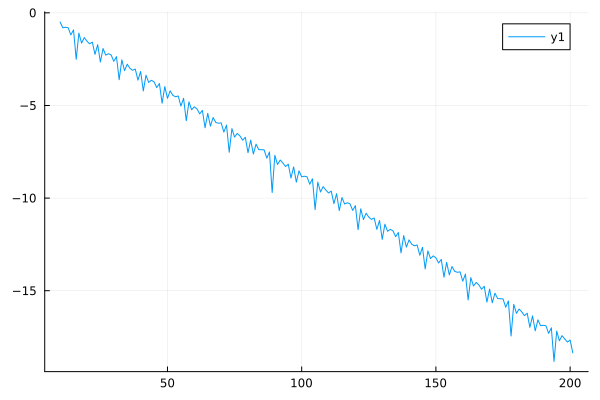

In [46]:
#余项分析
fdot(x,y,z) = @. x*y*z
function Sumxx(x,k,Cki)
    xx = Array{BigFloat}(undef,k)
    for i in 1:k
        xx[i] = sum(fdot(Cki[i,1:i],x[1:i],reverse!(x[1:i])))
    end
    return xx
end 

function Sumxyz(x,k,Cki)
    return sum(fdot(Cki[k,1:k],Sumxx(x[1:end],k,Cki),reverse!(x[1:end])))
end 

function steps2()
    h = BigFloat(1)/BigFloat(1)
    return h;
end
function order2()
    M=200;
    return M+1;
end
function DJCh2()
    Cki = Array{BigFloat}(undef,order2()-1,order2()-1);
    for k in 1:order2()-1
        for j in 1:k
            Cki[k,j] = 1
        end
    end
    
    for k in 2:order2()-2
        for i in 1:k-1
           Cki[k+1,i+1] = Cki[k,i] + Cki[k,i+1]
        end
    end
    return Cki
end
function multi2()
    S = Array{BigFloat}(undef,1,order2());
    S[1] = BigFloat(1)
    
    for i in 1:order2()-1
        S[i+1] = S[i]*steps2()/BigFloat(i)
    end
    
    return S
end
function Talor2(x,y,z,Cki)
    for k in 1:order2()-1
        if mod(k,4) == 1
            x[k+1] = y[k]
            y[k+1] = a*c^(k-1)*cos(c*Tin) - b*y[k] - x[k] - Sumxyz(x[1:k],k,Cki)
            z[k+1] = 0
        elseif mod(k,4) == 2
            x[k+1] = y[k]
            y[k+1] = -a*c^(k-1)*sin(c*Tin) - b*y[k] - x[k] - Sumxyz(x[1:k],k,Cki)
            z[k+1] = 0
        elseif mod(k,4) == 3
            x[k+1] = y[k]
            y[k+1] = -a*c^(k-1)*cos(c*Tin) - b*y[k] - x[k] - Sumxyz(x[1:k],k,Cki)
            z[k+1] = 0
        else
            x[k+1] = y[k]
            y[k+1] = a*c^(k-1)*sin(c*Tin) - b*y[k] - x[k] - Sumxyz(x[1:k],k,Cki)
            z[k+1] = 0
        end
    end
    
    return x,y,z
end

a =  BigFloat(2)+BigFloat(9)/BigFloat(100);
b =  BigFloat(1)/BigFloat(10);
c =  BigFloat(5)/BigFloat(10);

x = Array{BigFloat}(undef,order2())
y = Array{BigFloat}(undef,order2())
z = Array{BigFloat}(undef,order2())
x1 = Array{BigFloat}(undef,order2())
y1 = Array{BigFloat}(undef,order2())
z1 = Array{BigFloat}(undef,order2())
Shun = Array{BigFloat}(undef,order2()-1)
Dmulti = Array{BigFloat}(undef,1,order2());
Cki = Array{BigFloat}(undef,order2()-1,order2()-1);
Cki = DJCh2();
Dmulti = multi2();

x[1] = -BigFloat(1); 
y[1] = BigFloat(1); 
z[1] = -BigFloat(0);
Tin = BigFloat(0)

x,y,z = Talor2(x,y,z,Cki);
#println(convert(Float16,log10(abs(m))))
x1 = x[1:end].*Dmulti[1:end]
y1 = y[1:end].*Dmulti[1:end]
z1 = z[1:end].*Dmulti[1:end]
using Plots; 
plot(10:order2(),log10.(abs.(x1[10:end])))